# KEYPOINTS USING MP HOLESTIC


**Setup Mediapipe Holestic Model & Mediapipe Detection Function & Set Landmarks, Capture Video Feedback**

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic Model
mp_drawing = mp.solutions.drawing_utils # Drawing Utilities

In [3]:
# Stetting up Mediapipe Detection
def mediapipe_detection(image, model): 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR Conversion BGR 2 RGB
    image.flags.writeable = False                  # Image no longer writeable
    results = model.process(image)                 # Make Prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR Conversion RGB 2 BGR
    return image, results

In [4]:
 # Setting up the Landmarks & style for the keypoints
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(255,51,51), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(153,0,153), thickness=1, circle_radius=1)) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(153,0,0), thickness=2, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(0,0,0), thickness=1, circle_radius=1)) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(102,204,0), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(153,153,0), thickness=2, circle_radius=1)) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,128,255), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(153,51,255), thickness=2, circle_radius=1)) # Draw right hand connections

In [5]:
cap = cv2.VideoCapture(1)
# Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
       
        # Read Feed
        ret, frame = cap.read()
        
        # Make Detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw Landmarks
        draw_landmarks(image, results)
        
        # Show to Screen
        cv2.imshow('OpenCV Feed', image)
       
        # Break Gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [41]:
draw_landmarks(frame, results)

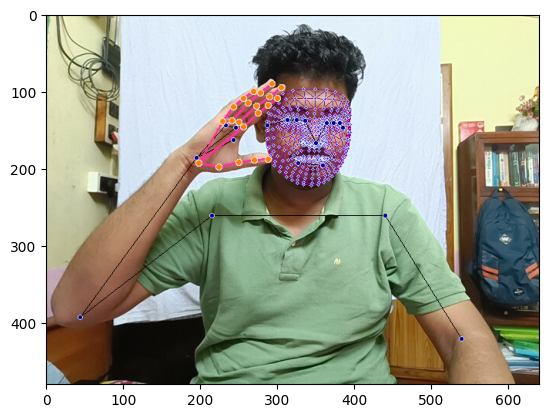

In [42]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
results.face_landmarks

landmark {
  x: 0.47292524576187134
  y: 0.29852333664894104
  z: -0.029132874682545662
}
landmark {
  x: 0.4707619547843933
  y: 0.2501427233219147
  z: -0.04667810723185539
}
landmark {
  x: 0.4720049798488617
  y: 0.2681847810745239
  z: -0.02704964019358158
}
landmark {
  x: 0.46368807554244995
  y: 0.21287362277507782
  z: -0.03119143284857273
}
landmark {
  x: 0.4704674482345581
  y: 0.2367711216211319
  z: -0.04851096123456955
}
landmark {
  x: 0.470479279756546
  y: 0.22154298424720764
  z: -0.04381256550550461
}
landmark {
  x: 0.47096872329711914
  y: 0.18863597512245178
  z: -0.016772514209151268
}
landmark {
  x: 0.4133906960487366
  y: 0.1999409794807434
  z: 0.02024824172258377
}
landmark {
  x: 0.4709227383136749
  y: 0.16579070687294006
  z: -0.008335920050740242
}
landmark {
  x: 0.4708064794540405
  y: 0.14989620447158813
  z: -0.008376161567866802
}
landmark {
  x: 0.47063297033309937
  y: 0.09350068867206573
  z: 0.007616931572556496
}
landmark {
  x: 0.473150283098

In [7]:
len(results.face_landmarks.landmark)

468

# EXTRACT KEYPOINTS VALUES

In [6]:
import numpy as np
# Creates array for all landmarks of same size & if no landmarks will fill with O.
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [7]:
# Extracting keypoints from the landmarks:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose, rh, lh, face])

In [10]:
extract_keypoints(results)

array([ 0.48139134,  0.24836417, -0.80622101, ...,  0.53678155,
        0.18940319,  0.01576904])

In [11]:
extract_keypoints(results).shape

(1662,)

# SETUP FOLDERS FOR COLLECTION

In [8]:
import os
import numpy as np

# Path for exported data, numpy array
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['again', 'also', 'ask', 'bad', 'boy', 'but', 'can', 'come', 'deaf', 'drink', 'drive', 'eat', 'excuse', 'family', 'feel',
                    'find', 'finish', 'hello'])

# Thirty Videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Check if the action directories exist before creating them
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# COLLECT KEYPOINT VALUES FOR TRAINING AND TESTING

In [9]:
# Initialize the Webcam
cap = cv2.VideoCapture(1) 

# Mediapipe holistic model setup
mp_holistic = mp.solutions.holistic  # Holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        all_sequences_complete = True  # Flag to track if all sequences for an action have enough frames
        
        for sequence in range(no_sequences):
            # Check if the sequence directory already has the specified number of frames
            sequence_path = os.path.join(DATA_PATH, action, str(sequence))
            if len(os.listdir(sequence_path)) >= sequence_length:
                print(f"Skipping sequence {sequence} of action '{action}' as it already has {sequence_length} frames.")
                continue
                
            # If any sequence requires more frames, set the flag to False
            all_sequences_complete = False
                
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # Read Feed
                ret, frame = cap.read()
                if not ret:
                    print("Failed to grab frame")
                    break
                
                # Make Detections
                image, results = mediapipe_detection(frame, holistic)
        
                # Draw Landmarks
                draw_landmarks(image, results)

                # Apply Wait Logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)  # Wait for 2 seconds
                else:
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                
                # Export Keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), f'{frame_num}.npy')
                np.save(npy_path, keypoints)

                # Save frame as PNG only if sequence number is less than 5
                if sequence < 5:
                    png_path = os.path.join(DATA_PATH, action, str(sequence), f'{frame_num}.png')
                    cv2.imwrite(png_path, frame)
                
                # Show to Screen
                cv2.imshow('OpenCV Feed', image)
                
                # Check if 'q' is pressed to terminate
                key = cv2.waitKey(1)
                if key == ord('q'):
                    break
            
            # Check if 'q' is pressed to terminate
            if key == ord('q'):
                break
        
        # If all sequences of the current action have enough frames, skip to the next action
        if all_sequences_complete:
            print(f"All sequences for action '{action}' already have enough frames. Skipping to the next action.")

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

Skipping sequence 0 of action 'again' as it already has 30 frames.
Skipping sequence 1 of action 'again' as it already has 30 frames.
Skipping sequence 2 of action 'again' as it already has 30 frames.
Skipping sequence 3 of action 'again' as it already has 30 frames.
Skipping sequence 4 of action 'again' as it already has 30 frames.
Skipping sequence 5 of action 'again' as it already has 30 frames.
Skipping sequence 6 of action 'again' as it already has 30 frames.
Skipping sequence 7 of action 'again' as it already has 30 frames.
Skipping sequence 8 of action 'again' as it already has 30 frames.
Skipping sequence 9 of action 'again' as it already has 30 frames.
Skipping sequence 10 of action 'again' as it already has 30 frames.
Skipping sequence 11 of action 'again' as it already has 30 frames.
Skipping sequence 12 of action 'again' as it already has 30 frames.
Skipping sequence 13 of action 'again' as it already has 30 frames.
Skipping sequence 14 of action 'again' as it already has 3

# Preprocess Data and Create Lables and Features

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
# Create label_map dictionary
label_map = {label:num for num, label in enumerate(actions)}

print(label_map)

{'again': 0, 'also': 1, 'ask': 2, 'bad': 3, 'boy': 4, 'but': 5, 'can': 6, 'come': 7, 'deaf': 8, 'drink': 9, 'drive': 10, 'eat': 11, 'excuse': 12, 'family': 13, 'feel': 14, 'find': 15, 'finish': 16, 'hello': 17}


In [12]:
# Load sequences and labels
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Flatten the sequences for normalization
X_train_flatten = X_train.reshape(-1, X_train.shape[-1])
X_test_flatten = X_test.reshape(-1, X_test.shape[-1])

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_flatten)
X_test_normalized = scaler.transform(X_test_flatten)

# Reshape back to the original shape
X_train_normalized = X_train_normalized.reshape(X_train.shape)
X_test_normalized = X_test_normalized.reshape(X_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train_flatten)
X_test_standardized = scaler_standard.transform(X_test_flatten)

# RobustScaler
scaler_robust = RobustScaler()
X_train_robust_scaled = scaler_robust.fit_transform(X_train_flatten)
X_test_robust_scaled = scaler_robust.transform(X_test_flatten)

# Sequence-level normalization
for i in range(len(X_train)):
    scaler = MinMaxScaler()
    X_train[i] = scaler.fit_transform(X_train[i])

for i in range(len(X_test)):
    scaler = MinMaxScaler()
    X_test[i] = scaler.fit_transform(X_test[i])


In [17]:
np.array(sequences).shape

(90, 30, 1662)

In [18]:
np.array(labels).shape

(90,)

In [22]:
X_train.shape

(85, 30, 1662)

In [23]:
X_test.shape

(5, 30, 1662)

In [24]:
y_train.shape

(85,)

In [25]:
y_test.shape

(5,)

# Build and Train LSTM Neural Network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split

In [15]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir) # Monitor neuro network training

**Build Neuro Network Architecture**

In [20]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='sigmoid', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='sigmoid'))
model.add(LSTM(64, return_sequences=False, activation='sigmoid'))
model.add(Dense(64))
model.add(LeakyReLU(negative_slope=0.3))  # Updated argument
model.add(Dense(32))
model.add(LeakyReLU(negative_slope=0.3))  # Updated argument
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\hellw\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [22]:
# Train the model
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - categorical_accuracy: 0.0485 - loss: 2.9234
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - categorical_accuracy: 0.0543 - loss: 2.8985
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.0585 - loss: 2.8941
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.0404 - loss: 2.8925
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - categorical_accuracy: 0.0502 - loss: 2.9033
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.0691 - loss: 2.8923
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.0802 - loss: 2.8780
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - categorical_accuracy: 0.0949 - loss: 2.8313
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - categorical_accuracy: 0.0936 - loss: 2.7384
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - categorical_accuracy: 0.0896 - loss: 2.5054
Epoch 11/

In [ ]:
model.fit(X_train_normalized, y_train, epochs=1000, callbacks=[tb_callback])

In [39]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 17)                  │             561 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,791,413 (6.83 MB)

 Trainable params: 597,137 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,194,276 (4.56 MB)

In [19]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64))
model.add(LeakyReLU(negative_slope=0.3))  # Updated argument
model.add(Dense(32))
model.add(LeakyReLU(negative_slope=0.3))  # Updated argument
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\hellw\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [21]:
# Train the model
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - categorical_accuracy: 0.0530 - loss: 2.8429
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.1374 - loss: 2.8007
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.1423 - loss: 2.5679
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.1837 - loss: 2.3291
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.2250 - loss: 2.0224
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.0571 - loss: 3.1779
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.1003 - loss: 2.5561
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.1286 - loss: 2.4291
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.1959 - loss: 2.1136
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.1602 - loss: 2.0570
Epoch 11/

In [ ]:
model.fit(X_train_normalized, y_train, epochs=1000, callbacks=[tb_callback])

In [39]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 17)                  │             561 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,791,413 (6.83 MB)

 Trainable params: 597,137 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,194,276 (4.56 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


C:\Users\hellw\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hellw\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hellw\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


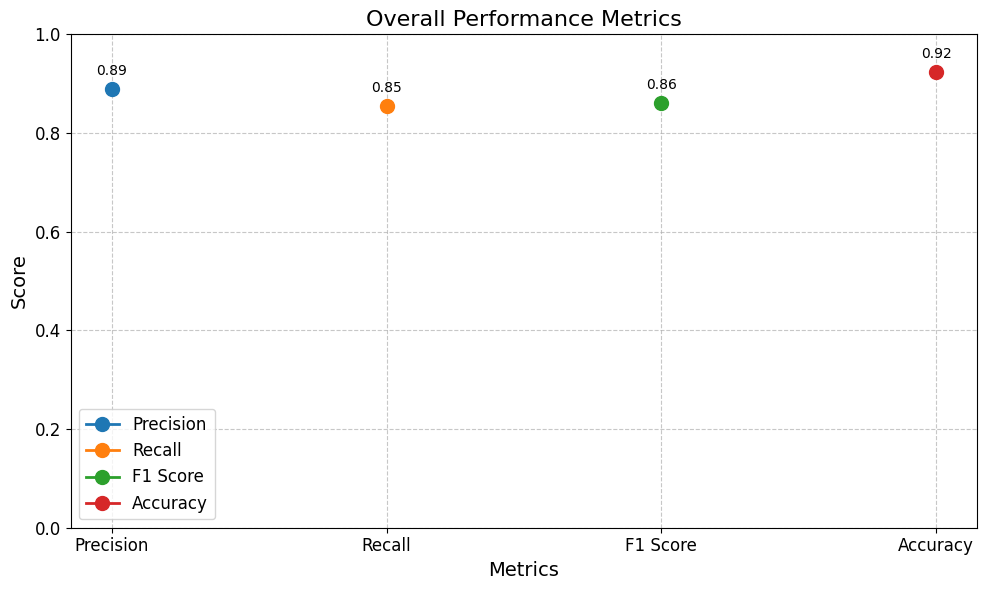

╒═══════════╤══════════╕
│ Metric    │    Score │
╞═══════════╪══════════╡
│ Precision │ 0.888889 │
├───────────┼──────────┤
│ Recall    │ 0.854167 │
├───────────┼──────────┤
│ F1 Score  │ 0.860317 │
├───────────┼──────────┤
│ Accuracy  │ 0.923077 │
╘═══════════╧══════════╛


In [22]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from tabulate import tabulate

# Train the model
history = model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback], verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Calculate precision, recall, F1 score, and support
report = classification_report(y_true, y_pred_classes, output_dict=True)

# Extract overall metrics
overall_precision = report['macro avg']['precision']
overall_recall = report['macro avg']['recall']
overall_f1_score = report['macro avg']['f1-score']

# Line names
lines = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

# Line heights
values = [overall_precision, overall_recall, overall_f1_score, accuracy]

# Create line plot
plt.figure(figsize=(10, 6))

# Define line colors for better distinction
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot lines with markers and increased marker size for better visibility
for i in range(len(lines)):
    plt.plot(lines[i], values[i], marker='o', color=colors[i], markersize=10, linewidth=2, label=lines[i])

    # Annotate data points with their exact values
    plt.annotate(f'{values[i]:.2f}', (lines[i], values[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

# Set labels and title with increased font size
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Overall Performance Metrics', fontsize=16)

plt.ylim(0, 1)  # Limit y-axis to range [0, 1] for scores

plt.grid(True, linestyle='--', alpha=0.7)  # Show grid with dashed lines for better readability
plt.xticks(fontsize=12)  # Increase font size of x-axis ticks
plt.yticks(fontsize=12)  # Increase font size of y-axis ticks

plt.legend(fontsize=12)  # Add legend with increased font size

plt.tight_layout()
plt.show()

# Prepare data for the table
table_data = [
    ['Metric', 'Score'],
    ['Precision', overall_precision],
    ['Recall', overall_recall],
    ['F1 Score', overall_f1_score],
    ['Accuracy', accuracy]
]

# Generate the table with enhanced formatting
table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


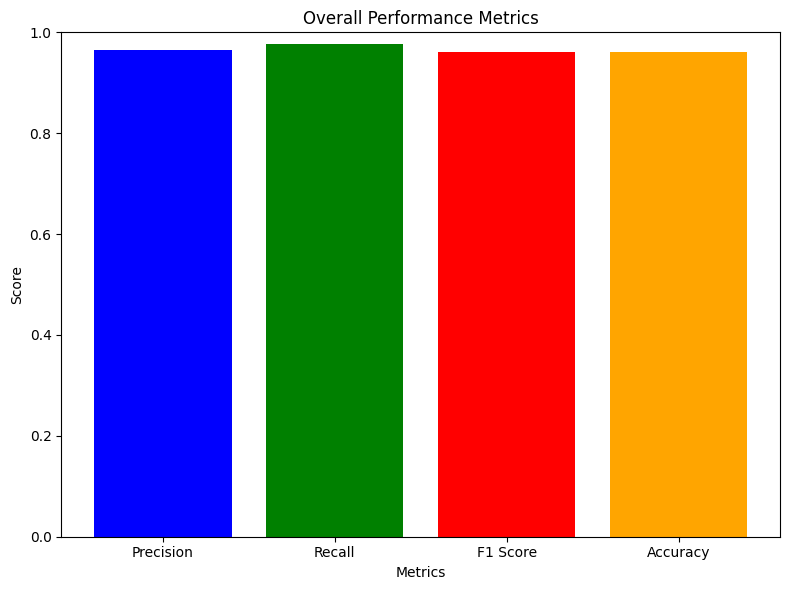

In [21]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback], verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Calculate precision, recall, F1 score, and support
report = classification_report(y_true, y_pred_classes, output_dict=True)

# Extract overall metrics
overall_precision = report['macro avg']['precision']
overall_recall = report['macro avg']['recall']
overall_f1_score = report['macro avg']['f1-score']

# Bar names
bars = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

# Bar heights
values = [overall_precision, overall_recall, overall_f1_score, accuracy]

# Create bar plot
plt.figure(figsize=(8, 6))

# Bar colors
colors = ['blue', 'green', 'red', 'orange']

# Plot bars
plt.bar(bars, values, color=colors)

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Overall Performance Metrics')
plt.ylim(0, 1)  # Limit y-axis to range [0, 1] for scores

plt.tight_layout()
plt.show()

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate

# Train the model
history = model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback], verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Calculate precision, recall, F1 score, and support
report = classification_report(y_true, y_pred_classes, output_dict=True)

# Extract overall metrics
overall_precision = report['macro avg']['precision']
overall_recall = report['macro avg']['recall']
overall_f1_score = report['macro avg']['f1-score']

# Generate table
data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [overall_precision, overall_recall, overall_f1_score, accuracy]
}

df = pd.DataFrame(data)

# Set font size
plt.rcParams.update({'font.size': 14})

# Display table with larger font
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign='center', stralign='center', colalign=('center', 'center'), floatfmt='.4f'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
╒═══════════╤═════════╕
│  Metric   │  Score  │
╞═══════════╪═════════╡
│ Precision │ 0.9615  │
├───────────┼─────────┤
│  Recall   │ 0.9615  │
├───────────┼─────────┤
│ F1 Score  │ 0.9487  │
├───────────┼─────────┤
│ Accuracy  │ 0.9615  │
╘═══════════╧═════════╛


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


<Figure size 800x600 with 0 Axes>

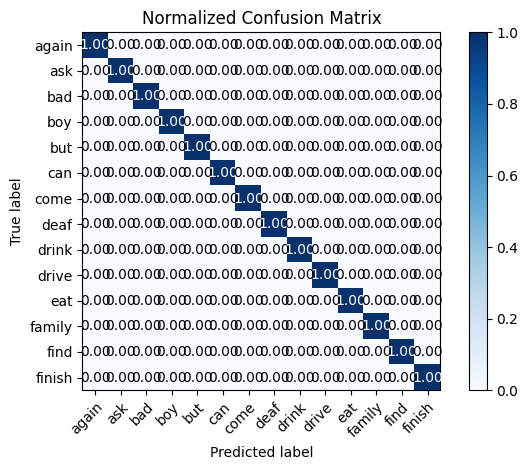

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict
import os

# Define the function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize confusion matrix if specified
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Train the model
history = model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback], verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(y_true, y_pred_classes, classes=actions, normalize=True)
plt.title('Normalized Confusion Matrix')
plt.show()

Training model with optimizer: Adam, activation: relu
Accuracy: 0.19230769574642181
Training model with optimizer: Adam, activation: tanh
Accuracy: 0.9230769276618958
Training model with optimizer: Adam, activation: sigmoid
Accuracy: 1.0
Training model with optimizer: RMSprop, activation: relu
Accuracy: 0.0
Training model with optimizer: RMSprop, activation: tanh
Accuracy: 1.0
Training model with optimizer: RMSprop, activation: sigmoid
Accuracy: 1.0
Training model with optimizer: SGD, activation: relu
Accuracy: 0.1538461595773697
Training model with optimizer: SGD, activation: tanh
Accuracy: 1.0
Training model with optimizer: SGD, activation: sigmoid
Accuracy: 0.03846153989434242
Training model with optimizer: Adadelta, activation: relu
Accuracy: 1.0
Training model with optimizer: Adadelta, activation: tanh
Accuracy: 0.6153846383094788
Training model with optimizer: Adadelta, activation: sigmoid
Accuracy: 0.03846153989434242


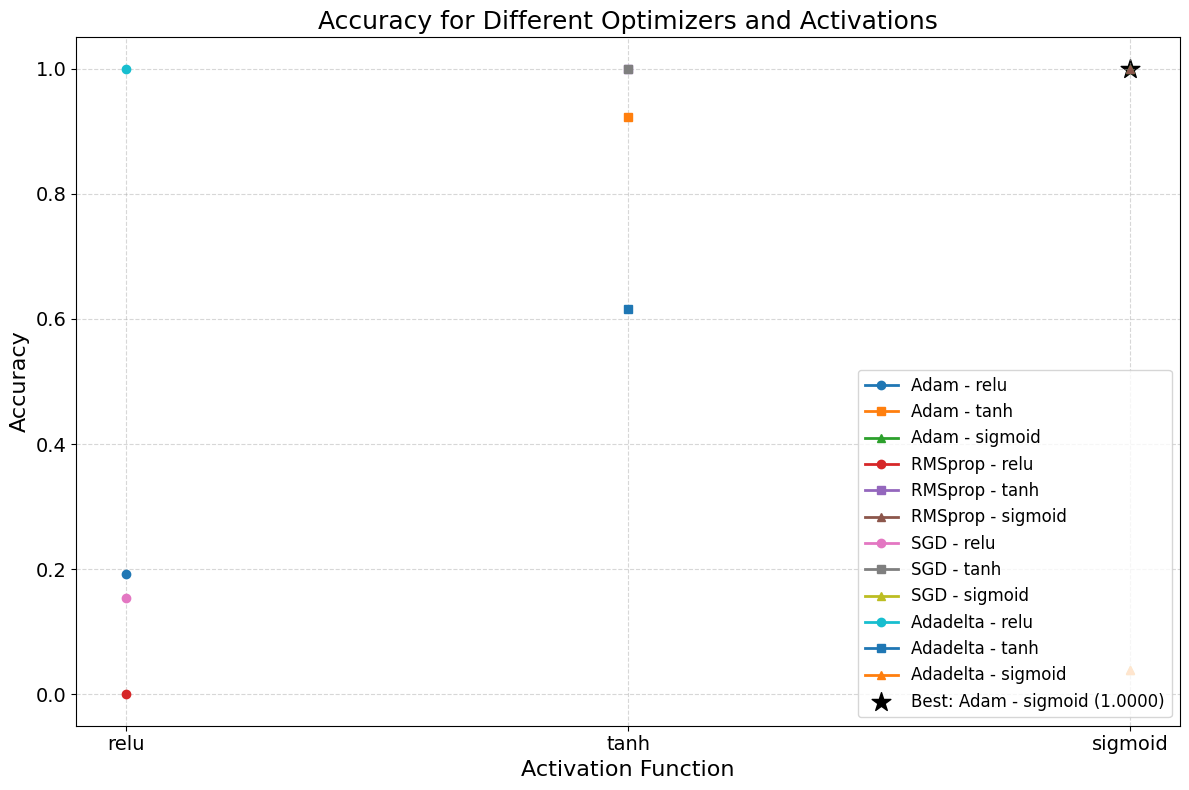




Accuracy Results
----------------
| Optimizer   | Activation | Accuracy   |
|-------------|------------|------------|
| Adam        | relu       | 0.1923     |
| Adam        | tanh       | 0.9231     |
| Adam        | sigmoid    | 1.0000     |
| RMSprop     | relu       | 0.0000     |
| RMSprop     | tanh       | 1.0000     |
| RMSprop     | sigmoid    | 1.0000     |
| SGD         | relu       | 0.1538     |
| SGD         | tanh       | 1.0000     |
| SGD         | sigmoid    | 0.0385     |
| Adadelta    | relu       | 1.0000     |
| Adadelta    | tanh       | 0.6154     |
| Adadelta    | sigmoid    | 0.0385     |
----------------



Best Combination
----------------
Optimizer: Adam
Activation: sigmoid
Accuracy: 1.0


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to create and compile the model
def create_model(optimizer, activation):
    model = Sequential() 
    model.add(LSTM(64, return_sequences=True, activation=activation, input_shape=(30,1662)))  
    model.add(LSTM(128, return_sequences=True, activation=activation))  
    model.add(LSTM(64, return_sequences=False, activation=activation))  
    model.add(Dense(64))
    model.add(LeakyReLU(negative_slope=0.3))  # Adding LeakyReLU as a layer
    model.add(Dense(32))
    model.add(LeakyReLU(negative_slope=0.3))  # Adding LeakyReLU as a layer
    model.add(Dense(actions.shape[0], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

# Define the combinations of optimizers and activations to try
optimizers = ['Adam', 'RMSprop', 'SGD', 'Adadelta']
activations = ['relu', 'tanh', 'sigmoid']

# Accuracy results for all optimizers and activations
results = {}

# Initialize variables to store the best accuracy and corresponding hyperparameters
best_accuracy = 0
best_optimizer = None
best_activation = None

# Iterate over all combinations of optimizers and activations
for optimizer in optimizers:
    results[optimizer] = {}
    for activation in activations:
        print(f"Training model with optimizer: {optimizer}, activation: {activation}")
        
        # Create and compile the model
        model = create_model(optimizer=optimizer, activation=activation)
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=0)
        
        # Evaluate the model on the test set
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        
        # Store accuracy in results
        results[optimizer][activation] = accuracy
        
        # Print the accuracy achieved with the current combination
        print(f"Accuracy: {accuracy}")
        
        # Update the best accuracy and corresponding hyperparameters if the current combination performs better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_optimizer = optimizer
            best_activation = activation

# Line graph
plt.figure(figsize=(12, 8))

markers = ['o', 's', '^', 'D']
for i, optimizer in enumerate(optimizers):
    for j, activation in enumerate(activations):
        plt.plot(activation, results[optimizer][activation], marker=markers[j], linestyle='-', label=f'{optimizer} - {activation}', linewidth=2)

# Plot accuracy of the best combination
plt.scatter(best_activation, best_accuracy, marker='*', color='black', s=200, label=f'Best: {best_optimizer} - {best_activation} ({best_accuracy:.4f})')

plt.title('Accuracy for Different Optimizers and Activations', fontsize=18)
plt.xlabel('Activation Function', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, alpha=0.5, linestyle='--')
plt.xticks(activations, fontsize=14)  # Set x-ticks to activation names
plt.yticks(fontsize=14)  # Set y-ticks font size
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Table of accuracy results
print("\n\n")
print("Accuracy Results")
print("----------------")
print("| Optimizer   | Activation | Accuracy   |")
print("|-------------|------------|------------|")
for optimizer in optimizers:
    for activation in activations:
        accuracy = results[optimizer][activation]
        print(f"| {optimizer:<11} | {activation:<10} | {accuracy:<10.4f} |")
print("----------------")

# Best combination
print("\n\n")
print("Best Combination")
print("----------------")
print(f"Optimizer: {best_optimizer}")
print(f"Activation: {best_activation}")
print(f"Accuracy: {best_accuracy}")

In [25]:
# Define the model using LSTM & DENSE
model = Sequential() 
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,1662)))  # 64 LSTM units
model.add(LSTM(128, return_sequences=True, activation='tanh'))  # 128 LSTM units
model.add(LSTM(64, return_sequences=False, activation='tanh'))  # 64 LSTM units
model.add(Dense(64, activation='tanh'))  # 64 Dense units
model.add(Dense(32, activation='tanh'))  # 32 Dense units
model.add(Dense(actions.shape[0], activation='softmax'))

In [26]:
# Compile the model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [27]:
# Train the model
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - categorical_accuracy: 0.0790 - loss: 2.9270
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - categorical_accuracy: 0.0745 - loss: 2.7985
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.1166 - loss: 2.6073
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.1598 - loss: 2.3718
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.1109 - loss: 2.4914
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - categorical_accuracy: 0.1308 - loss: 2.2445
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.1778 - loss: 2.2016
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - categorical_accuracy: 0.2218 - loss: 2.0989
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - categorical_accuracy: 0.2122 - loss: 2.0061
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - categorical_accuracy: 0.1409 - loss: 2.5021
Epoch 11/

In [35]:
model.summary() 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,720 (6.83 MB)

 Trainable params: 596,906 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,814 (4.55 MB)

Training model with optimizer: Adam, activation: relu
Accuracy: 0.8888888955116272
Training model with optimizer: Adam, activation: tanh
Accuracy: 0.8888888955116272
Training model with optimizer: Adam, activation: sigmoid
Accuracy: 0.5555555820465088
Training model with optimizer: RMSprop, activation: relu
Accuracy: 0.0
Training model with optimizer: RMSprop, activation: tanh
Accuracy: 0.9629629850387573
Training model with optimizer: RMSprop, activation: sigmoid
Accuracy: 0.9259259104728699
Training model with optimizer: SGD, activation: relu
Accuracy: 0.0
Training model with optimizer: SGD, activation: tanh
Accuracy: 0.9259259104728699
Training model with optimizer: SGD, activation: sigmoid
Accuracy: 0.03703703731298447
Training model with optimizer: Adadelta, activation: relu
Accuracy: 0.5185185074806213
Training model with optimizer: Adadelta, activation: tanh
Accuracy: 0.5555555820465088
Training model with optimizer: Adadelta, activation: sigmoid
Accuracy: 0.03703703731298447


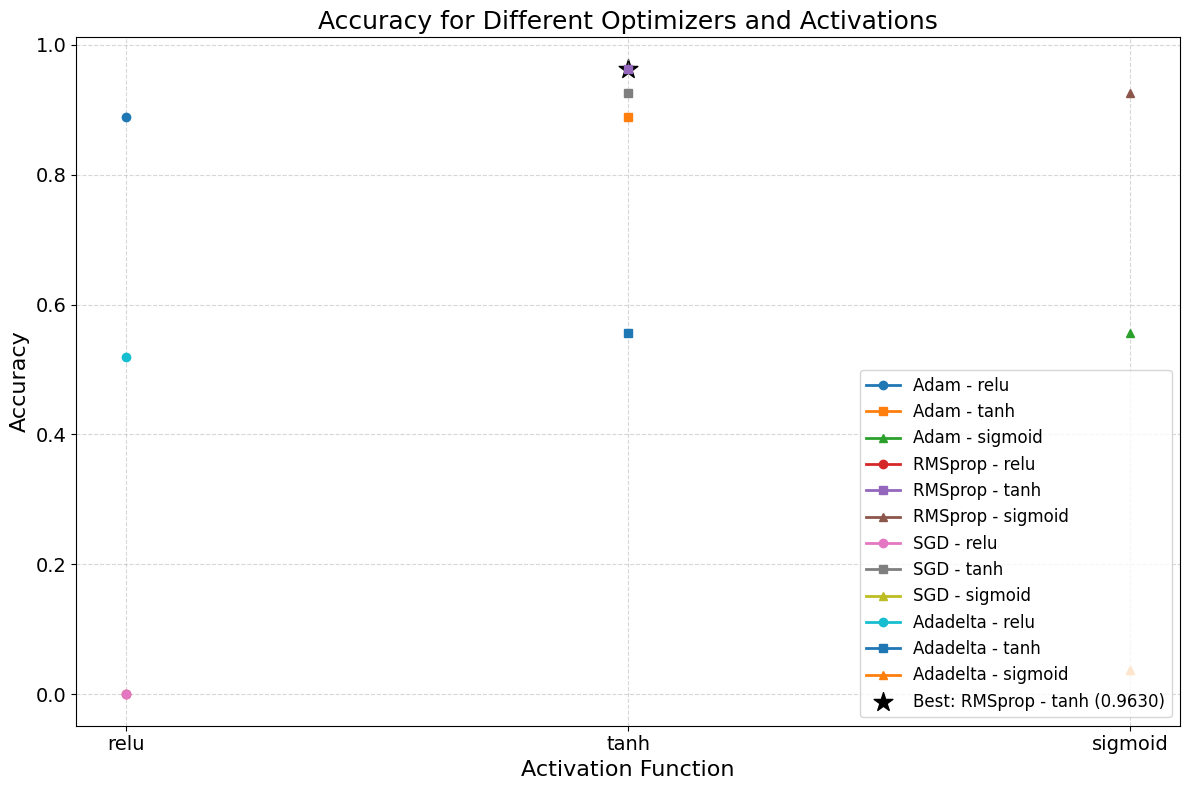




Accuracy Results
----------------
| Optimizer   | Activation | Accuracy   |
|-------------|------------|------------|
| Adam        | relu       | 0.8889     |
| Adam        | tanh       | 0.8889     |
| Adam        | sigmoid    | 0.5556     |
| RMSprop     | relu       | 0.0000     |
| RMSprop     | tanh       | 0.9630     |
| RMSprop     | sigmoid    | 0.9259     |
| SGD         | relu       | 0.0000     |
| SGD         | tanh       | 0.9259     |
| SGD         | sigmoid    | 0.0370     |
| Adadelta    | relu       | 0.5185     |
| Adadelta    | tanh       | 0.5556     |
| Adadelta    | sigmoid    | 0.0370     |
----------------



Best Combination
----------------
Optimizer: RMSprop
Activation: tanh
Accuracy: 0.9629629850387573


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to create and compile the model
def create_model(optimizer, activation):
    model = Sequential() 
    model.add(LSTM(64, return_sequences=True, activation=activation, input_shape=(30,1662)))  
    model.add(LSTM(128, return_sequences=True, activation=activation))  
    model.add(LSTM(64, return_sequences=False, activation=activation))  
    model.add(Dense(64, activation=activation))  
    model.add(Dense(32, activation=activation))  
    model.add(Dense(actions.shape[0], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

# Define the combinations of optimizers and activations to try
optimizers = ['Adam', 'RMSprop', 'SGD', 'Adadelta']
activations = ['relu', 'tanh', 'sigmoid']

# Accuracy results for all optimizers and activations
results = {}

# Initialize variables to store the best accuracy and corresponding hyperparameters
best_accuracy = 0
best_optimizer = None
best_activation = None

# Iterate over all combinations of optimizers and activations
for optimizer in optimizers:
    results[optimizer] = {}
    for activation in activations:
        print(f"Training model with optimizer: {optimizer}, activation: {activation}")
        
        # Create and compile the model
        model = create_model(optimizer=optimizer, activation=activation)
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=0)
        
        # Evaluate the model on the test set
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        
        # Store accuracy in results
        results[optimizer][activation] = accuracy
        
        # Print the accuracy achieved with the current combination
        print(f"Accuracy: {accuracy}")
        
        # Update the best accuracy and corresponding hyperparameters if the current combination performs better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_optimizer = optimizer
            best_activation = activation

# Line graph
plt.figure(figsize=(12, 8))

markers = ['o', 's', '^', 'D']
for i, optimizer in enumerate(optimizers):
    for j, activation in enumerate(activations):
        plt.plot(activation, results[optimizer][activation], marker=markers[j], linestyle='-', label=f'{optimizer} - {activation}', linewidth=2)

# Plot accuracy of the best combination
plt.scatter(best_activation, best_accuracy, marker='*', color='black', s=200, label=f'Best: {best_optimizer} - {best_activation} ({best_accuracy:.4f})')

plt.title('Accuracy for Different Optimizers and Activations', fontsize=18)
plt.xlabel('Activation Function', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, alpha=0.5, linestyle='--')
plt.xticks(activations, fontsize=14)  # Set x-ticks to activation names
plt.yticks(fontsize=14)  # Set y-ticks font size
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Table of accuracy results
print("\n\n")
print("Accuracy Results")
print("----------------")
print("| Optimizer   | Activation | Accuracy   |")
print("|-------------|------------|------------|")
for optimizer in optimizers:
    for activation in activations:
        accuracy = results[optimizer][activation]
        print(f"| {optimizer:<11} | {activation:<10} | {accuracy:<10.4f} |")
print("----------------")

# Best combination
print("\n\n")
print("Best Combination")
print("----------------")
print(f"Optimizer: {best_optimizer}")
print(f"Activation: {best_activation}")
print(f"Accuracy: {best_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


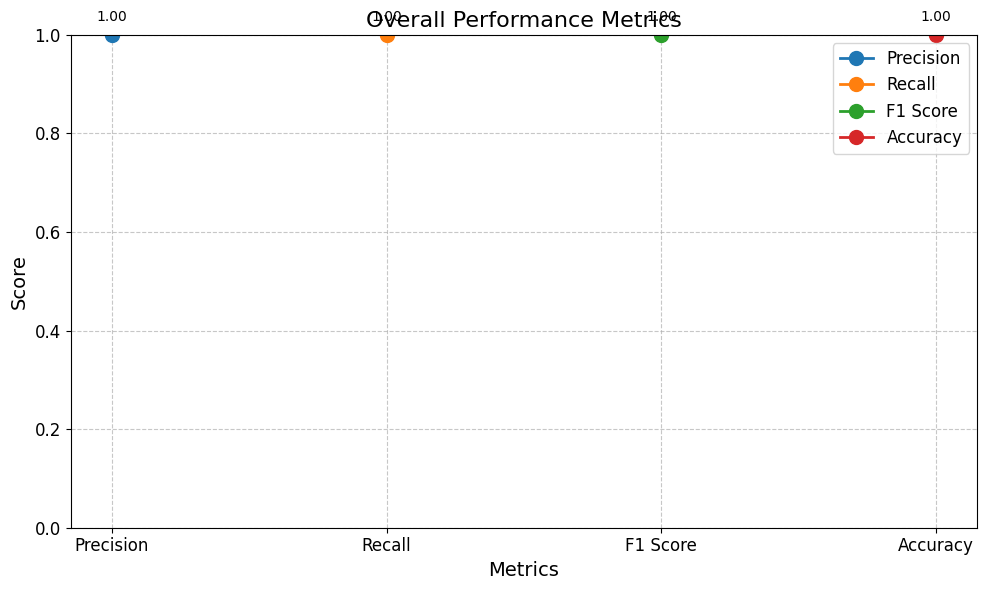

╒═══════════╤═════════╕
│ Metric    │   Score │
╞═══════════╪═════════╡
│ Precision │       1 │
├───────────┼─────────┤
│ Recall    │       1 │
├───────────┼─────────┤
│ F1 Score  │       1 │
├───────────┼─────────┤
│ Accuracy  │       1 │
╘═══════════╧═════════╛


In [23]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from tabulate import tabulate

# Train the model
history = model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback], verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Calculate precision, recall, F1 score, and support
report = classification_report(y_true, y_pred_classes, output_dict=True)

# Extract overall metrics
overall_precision = report['macro avg']['precision']
overall_recall = report['macro avg']['recall']
overall_f1_score = report['macro avg']['f1-score']

# Line names
lines = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

# Line heights
values = [overall_precision, overall_recall, overall_f1_score, accuracy]

# Create line plot
plt.figure(figsize=(10, 6))

# Define line colors for better distinction
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot lines with markers and increased marker size for better visibility
for i in range(len(lines)):
    plt.plot(lines[i], values[i], marker='o', color=colors[i], markersize=10, linewidth=2, label=lines[i])

    # Annotate data points with their exact values
    plt.annotate(f'{values[i]:.2f}', (lines[i], values[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

# Set labels and title with increased font size
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Overall Performance Metrics', fontsize=16)

plt.ylim(0, 1)  # Limit y-axis to range [0, 1] for scores

plt.grid(True, linestyle='--', alpha=0.7)  # Show grid with dashed lines for better readability
plt.xticks(fontsize=12)  # Increase font size of x-axis ticks
plt.yticks(fontsize=12)  # Increase font size of y-axis ticks

plt.legend(fontsize=12)  # Add legend with increased font size

plt.tight_layout()
plt.show()

# Prepare data for the table
table_data = [
    ['Metric', 'Score'],
    ['Precision', overall_precision],
    ['Recall', overall_recall],
    ['F1 Score', overall_f1_score],
    ['Accuracy', accuracy]
]

# Generate the table with enhanced formatting
table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad, Adadelta, Adamax, Nadam

# Define a function to create and compile the model
def create_model(optimizer, activation):
    model = Sequential() 
    model.add(LSTM(64, return_sequences=True, activation=activation, input_shape=(30,1662)))  
    model.add(LSTM(128, return_sequences=True, activation=activation))  
    model.add(LSTM(64, return_sequences=False, activation=activation))  
    model.add(Dense(64))
    model.add(LeakyReLU(negative_slope=0.3))  # Adding LeakyReLU as a layer
    model.add(Dense(32))
    model.add(LeakyReLU(negative_slope=0.3))  # Adding LeakyReLU as a layer
    model.add(Dense(actions.shape[0], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

# Define the combinations of optimizers and activations to try
optimizers = ['Adam', 'RMSprop', 'SGD', 'Adadelta']
activations = ['relu', 'tanh', 'sigmoid']

# Initialize variables to store the best accuracy and corresponding hyperparameters
best_accuracy = 0
best_optimizer = None
best_activation = None

# Iterate over all combinations of optimizers and activations
for optimizer in optimizers:
    for activation in activations:
        optimizer_instance = eval(optimizer)()
        
        print(f"Training model with optimizer: {optimizer_instance.get_config()['name']}, activation: {activation}")
        
        # Create and compile the model
        model = create_model(optimizer=optimizer_instance, activation=activation)
        
        # Train the model
        model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=0)
        
        # Evaluate the model on the test set
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        
        # Print the accuracy achieved with the current combination
        print(f"Accuracy: {accuracy}")
        
        # Update the best accuracy and corresponding hyperparameters if the current combination performs better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_optimizer = optimizer_instance.get_config()['name']
            best_activation = activation

# Print the best combination of optimizer and activation function
print(f"Best combination - Optimizer: {best_optimizer}, Activation: {best_activation}, Accuracy: {best_accuracy}")

Training model with optimizer: adam, activation: relu
Accuracy: 0.800000011920929
Training model with optimizer: adam, activation: elu
Accuracy: 0.20000000298023224
Training model with optimizer: adam, activation: selu
Accuracy: 0.800000011920929
Training model with optimizer: adam, activation: tanh
Accuracy: 1.0
Training model with optimizer: adam, activation: sigmoid
Accuracy: 1.0
Training model with optimizer: adam, activation: hard_sigmoid
Accuracy: 1.0
Training model with optimizer: adam, activation: linear
Accuracy: 0.6000000238418579
Training model with optimizer: rmsprop, activation: relu
Accuracy: 0.20000000298023224
Training model with optimizer: rmsprop, activation: elu
Accuracy: 0.4000000059604645
Training model with optimizer: rmsprop, activation: selu
Accuracy: 0.20000000298023224
Training model with optimizer: rmsprop, activation: tanh
Accuracy: 1.0
Training model with optimizer: rmsprop, activation: sigmoid
Accuracy: 1.0
Training model with optimizer: rmsprop, activatio

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Define a function to create and compile the model
def create_model(optimizer, activation):
    model = Sequential() 
    model.add(LSTM(64, return_sequences=True, activation=activation, input_shape=(30,1662)))  
    model.add(LSTM(128, return_sequences=True, activation=activation))  
    model.add(LSTM(64, return_sequences=False, activation=activation))  
    model.add(Dense(64, activation=activation))  
    model.add(Dense(32, activation=activation))  
    model.add(Dense(actions.shape[0], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

# Define the combinations of optimizers and activations to try
optimizers = ['Adam', 'RMSprop', 'SGD', 'Adadelta']
activations = ['relu', 'tanh', 'sigmoid']

# Initialize variables to store the best accuracy and corresponding hyperparameters
best_accuracy = 0
best_optimizer = None
best_activation = None

# Iterate over all combinations of optimizers and activations
for optimizer in optimizers:
    for activation in activations:
        print(f"Training model with optimizer: {optimizer}, activation: {activation}")
        
        # Create and compile the model
        model = create_model(optimizer=optimizer, activation=activation)
        
        # Train the model
        model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=0)
        
        # Evaluate the model on the test set
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        
        # Print the accuracy achieved with the current combination
        print(f"Accuracy: {accuracy}")
        
        # Update the best accuracy and corresponding hyperparameters if the current combination performs better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_optimizer = optimizer
            best_activation = activation

# Print the best combination of optimizer and activation function
print(f"Best combination - Optimizer: {best_optimizer}, Activation: {best_activation}, Accuracy: {best_accuracy}")

Training model with optimizer: Adam, activation: relu
Accuracy: 1.0
Training model with optimizer: Adam, activation: elu
Accuracy: 0.20000000298023224
Training model with optimizer: Adam, activation: selu
Accuracy: 1.0
Training model with optimizer: Adam, activation: tanh
Accuracy: 1.0
Training model with optimizer: Adam, activation: sigmoid
Accuracy: 0.6000000238418579
Training model with optimizer: Adam, activation: hard_sigmoid
Accuracy: 0.20000000298023224
Training model with optimizer: Adam, activation: linear
Accuracy: 0.6000000238418579
Training model with optimizer: RMSprop, activation: relu
Accuracy: 0.20000000298023224
Training model with optimizer: RMSprop, activation: elu
Accuracy: 0.20000000298023224
Training model with optimizer: RMSprop, activation: selu
Accuracy: 0.20000000298023224
Training model with optimizer: RMSprop, activation: tanh
Accuracy: 1.0
Training model with optimizer: RMSprop, activation: sigmoid
Accuracy: 1.0
Training model with optimizer: RMSprop, activ

# MAKE PRDICTIONS

In [26]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


In [27]:
actions[np.argmax(res[0])]

'again'

In [28]:
actions[np.argmax(y_test[0])]

'again'

# SAVE WEIGHTS

In [28]:
# Save the model in the .h5 format
model.save('action.h5')

In [29]:
# Load the entire model 
model.load_weights('action.h5')

# EVALUATION USING CONFUSION MATRIX AND ACCURACY

In [31]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [32]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [33]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [34]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[6, 0],
        [0, 3]],

       [[7, 0],
        [0, 2]],

       [[7, 0],
        [0, 2]],

       [[8, 0],
        [0, 1]],

       [[8, 0],
        [0, 1]]], dtype=int64)

In [35]:
accuracy_score(ytrue, yhat)

1.0

In [36]:
yhat = model.predict(X_train)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [37]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [38]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[144,   0],
        [  0,  27]],

       [[143,   0],
        [  0,  28]],

       [[143,   0],
        [  0,  28]],

       [[142,   0],
        [  0,  29]],

       [[141,   0],
        [  0,  30]],

       [[142,   0],
        [  0,  29]]], dtype=int64)

In [39]:
accuracy_score(ytrue, yhat)

1.0

# TEST IN REAL TIME

In [54]:
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            # 3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),  
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti